In [9]:
import math
import numpy as np 
import matplotlib.pyplot as plt
import math



In [10]:
def f(h):
    return h**3 - 10*h + 5*math.exp(-h/2) - 2

In [11]:
x=np.linspace(-10,100,500)
y = [f(i) if i > 0 else np.nan for i in x]


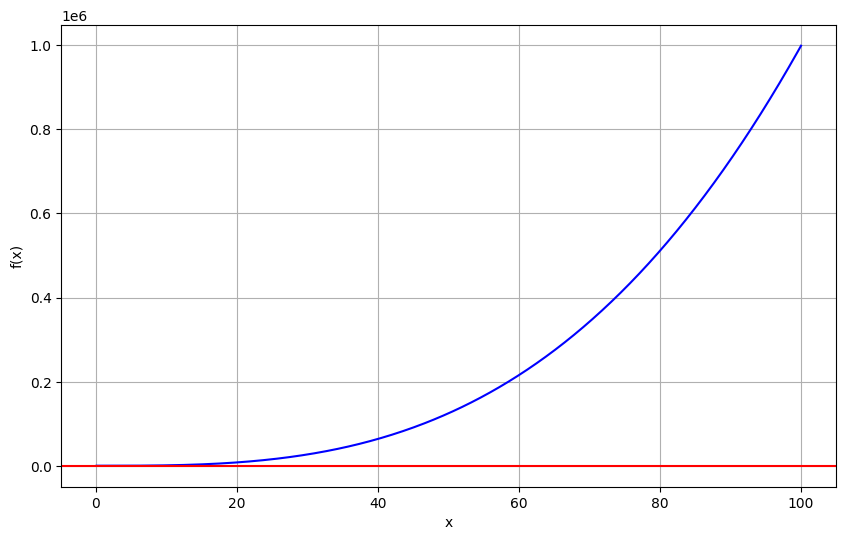

In [12]:
plt.figure(figsize=(10,6))
plt.plot(x,y,color='blue')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(y=0,color='red')
plt.grid(True)
plt.show()

In [13]:
def f_prime(h):
    return 3*h**2 - 10 - (5/2)*math.exp(-h/2)

In [14]:
def newton_rapson_method(xi,threshold=0.001,max_iteration=100,verbose=True):
    if(f_prime(xi)==0):
        raise ValueError("Error: f' can't be zero")
    iteration = 0
    results = []
    xr_old = xi
    converged = False
    if verbose:
        print("="*80)
        print(f"{'Iter':<5} {'xi':<15} {'x_i+1':<15}  {'f(xr)':<15} {'εa (%)':<12}")
        print("="*80)
    while iteration<max_iteration:
        iteration+=1
        xr=xi-(f(xi)/f_prime(xi))
        ea=abs((xr-xr_old)/xr)*100
        results.append({
            'Iteration': iteration,
            'x_i': xi,
            'x_i+1': xr, 
            'f(x_i+1)': f(xr),
            'ea(%)': ea if ea != float('inf') else None,
            
        })
        if verbose:
            ea_str = f"{ea:.8f}" if ea != float('inf') else "N/A"
            print(f"{iteration:<5} {xi:<15.10f} {xr:<15.10f} {f(xr):<15.10f} {ea_str:<12}")
        
        
        if iteration > 1 and ea < threshold:
            converged = True
            if verbose:
                print("="*80)
                print(f"CONVERGENCE ACHIEVED!")
                print(f"Approximate relative error = {ea:.10f}% < {threshold}%")
            break
        xi=xr
        xr_old=xr
    if not converged and verbose:
        print(f"Maximum iterations ({max_iteration}) reached without convergence")
    
    return results, xr
    
        

In [15]:
xi=1.5
stopping=0.001
results, final_root = newton_rapson_method(xi,stopping)

print(f"\nFINAL RESULT:")
print(f"Root: x = {final_root:.10f}")
print(f"f(x) = {f(final_root):.10f}")
print(f"Total iterations: {len(results)}")


Iter  xi              x_i+1            f(xr)           εa (%)      
1     1.5000000000    -1.0419498509   15.7066372681   243.96086325
2     -1.0419498509   0.3921591266    -1.7515474162   365.69567814
3     0.3921591266    0.2410790125    0.0354315013    62.66829808 
4     0.2410790125    0.2440214011    0.0000110812    1.20579119  
5     0.2440214011    0.2440223219    0.0000000000    0.00037735  
CONVERGENCE ACHIEVED!
Approximate relative error = 0.0003773467% < 0.001%

FINAL RESULT:
Root: x = 0.2440223219
f(x) = 0.0000000000
Total iterations: 5


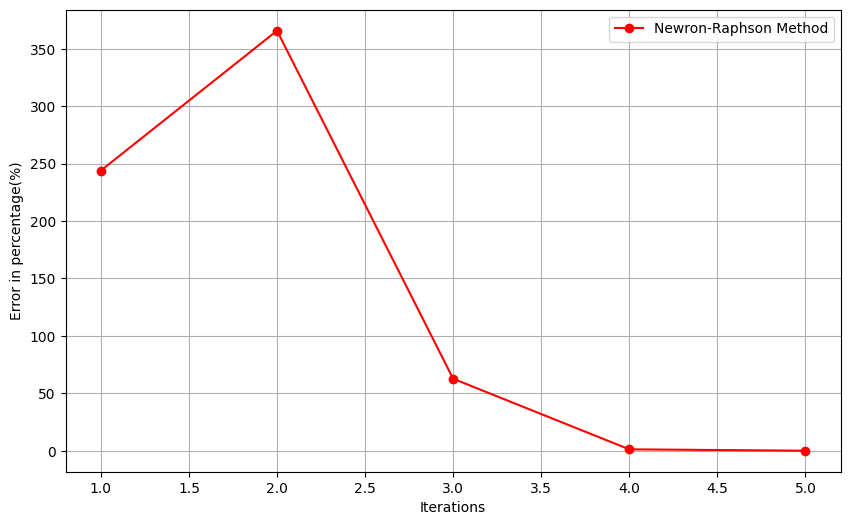

In [16]:
plt.figure(figsize=(10,6))
x=[]
y=[]
for i in range(len(results)):
    x.append(i+1)
    y.append(results[i]['ea(%)'])
    
    
plt.plot(x,y,color='red',label="Newron-Raphson Method",marker='o')
plt.xlabel("Iterations")
plt.ylabel("Error in percentage(%)")
plt.legend()
plt.grid()
plt.show()